## 09. 선형 회귀 분석

### import

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, scipy, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
matplotlib 3.5.3
seaborn 0.12.2


### 예제 데이터셋 준비

In [2]:
df_berry = pd.read_csv('data/wild_blueberry.csv')
df_berry.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


###  1. 회귀 분석

####  변수들 간의 관계를 수학적으로 모델링

- 변수 간의 관계를 파악하여 예측 과 요인 분석
- 종속 변수(Y): 예측하거나 설명하고자 하는 대상
- 독립 변수(X): 종속 변수에 영향을 줄 수 있는 변수


### 2. 선형 회귀

#### 종속 변수(Y)와 독립 변수(X)의 관계를 선형 함수로 나타냄

- 단순 선형회귀(Simple Linear Regression)

$Y=\beta_0+\beta_1X+\epsilon$

> $\beta_0$: 절편(Intecept)
>
> $\beta_1$: 계수(기울기)
>
> $epsilon$: 오차항(Error Term)

#### 주요 가정
- 선형성(Linearity)
- 등분산성(Homoscedasticity)
- 정규성(Normality)
> $\epsilon \sim N(0, \sigma^2)
- 독립성(Independence): 관측치는 서로 독립

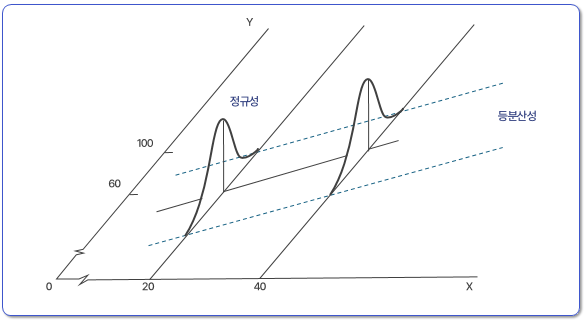

### 3. 선형회귀 모델 추정

#### 최소제곱법(Least Square Method)

$𝑦_𝑖=\beta_0+\beta_1𝑥_𝑖+\epsilon_𝑖$

$\hat{𝑦}_𝑖=\hat{\beta}_0+\hat{\beta}_1𝑥_𝑖$

$SSE = \sum_{i=1}^n(y_i-\hat{y}_i)^2$

▷ SSE(오차제곱합)을 최소화하는 $\beta_0, \beta_1$을 추정

$L(\hat{\beta}_0, \hat{\beta}_1) = \sum_{i=1}^{n} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2$

$\frac{\partial L(\hat{\beta}_0, \hat{\beta}_1)}{\partial \hat{\beta}_0} = 0$, $\frac{\partial L(\hat{\beta}_1, \hat{\beta}_1)}{\partial \hat{\beta}_0} = 0$

정규방정식(Normal Equation)의 해,

$\hat{\beta}_1 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i - \overline{x})^2}$

$\hat{\beta}_0 = \bar{y}-\hat{\beta}_1\bar{x}$

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

단순 선형 회귀(Simple Linear Regression) - 독립 변수의 수가 하나인 선형 회귀 모델

df_berry에서 

clonesize == 12.5 and honeybee == 0.25 and bumbles == 0.25 and AverageOfUpperTRange == 71.9 and AverageLowerTRange == 50.8 

인 관측 데이터만 선택하여 df_berry2를 만듭니다.

df_berry2에서 yield 는 종속 변수 fruitset은 독립 변수로 회귀 모델을 만들어 봅니다.
    
</div>

In [3]:
df_berry2 = df_berry.query(
    'clonesize == 12.5 and honeybee == 0.25 and bumbles == 0.25 and AverageOfUpperTRange == 71.9 and AverageOfLowerTRange == 50.8'
)
df_berry2.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
51,51,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.521950,0.456937,36.852363,5996.078548
52,52,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.561962,0.476308,39.096884,6691.043218
55,55,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.466974,0.429452,33.669875,4999.156215
56,56,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.391598,0.400083,30.662187,3968.330182
67,67,12.5,0.25,0.25,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.552129,0.471650,38.577167,6578.235221


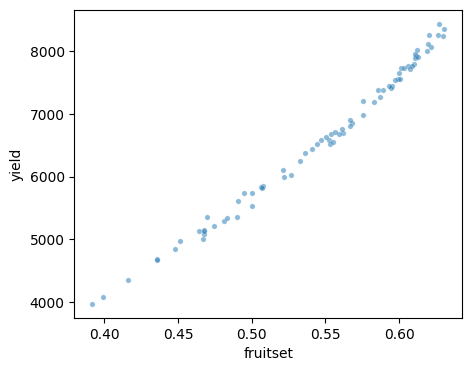

In [4]:
plt.figure(figsize=(5, 4))
sns.scatterplot(df_berry2, x='fruitset', y='yield', s = 15, alpha=0.5)
plt.show()

In [5]:
x_bar, y_bar = df_berry2['fruitset'].mean(), df_berry2['yield'].mean()
x_diff = df_berry2['fruitset'] - x_bar
beta_hat_1 = x_diff.dot((df_berry2['yield'] - y_bar).values) / x_diff.dot(x_diff)
beta_hat_0 = y_bar - beta_hat_1 * x_bar
beta_hat_1, beta_hat_0

(18664.9449142269, -3595.38855800089)

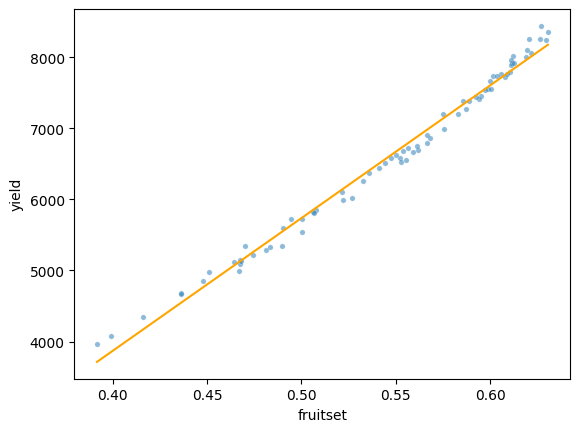

In [6]:
sns.scatterplot(df_berry2, x='fruitset', y='yield', s = 15, alpha=0.5)
plt.plot(
    df_berry2[['fruitset']].agg(['min', 'max']), 
    df_berry2[['fruitset']].agg(['min', 'max']) * beta_hat_1 + beta_hat_0 ,
    color = 'orange'
)
plt.show()

In [7]:
from statsmodels.api import OLS

lm = OLS(df_berry2['yield'], df_berry2[['fruitset']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  yield   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.851e+04
Date:                Mon, 17 Nov 2025   Prob (F-statistic):                    1.54e-91
Time:                        12:57:56   Log-Likelihood:                         -568.06
No. Observations:                  76   AIC:                                      1138.
Df Residuals:                      75   BIC:                                      1140.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fruitset    1.217e+04     89.486    136.041      0.000     1.2e+04    1.24e+04
==============================================================================
Omnibus:                       15.884   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.047
Skew:                           0.079   Prob(JB):                        0.132
Kurtosis:                       1.881   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from statsmodels.formula.api import ols
# patsy formula를 통해 종속변수와 독립 변수를 정의합니다.
lm = ols('yield_ ~ fruitset', data=df_berry2.rename(columns={'yield': 'yield_'})).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yield_   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     6515.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           6.82e-74
Time:                        12:57:56   Log-Likelihood:                -474.32
No. Observations:                  76   AIC:                             952.6
Df Residuals:                      74   BIC:                             957.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3595.3886    127.259    -28.253      0.000   -3848.957   -3341.820
fruitset    1.866e+04    231.246     80.715      0.000    1.82e+04    1.91e+04
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.934
Skew:                           0.351   Prob(JB):                        0.380
Kurtosis:                       2.656   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

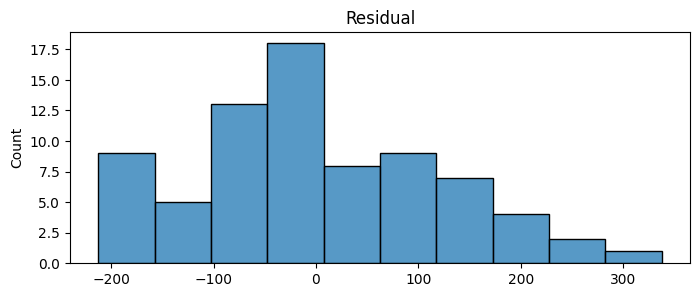

In [9]:
plt.figure(figsize=(8,3))
sns.histplot(lm.resid, bins=10)
plt.title('Residual')
plt.show()

#### 제곱합: Sum of Squares

| 제곱합 | 공식 | 동의어 |
| --- | --- | --- |
| 총 제곱합<br/>(Sum of Squares of Total) |$$SST=\sum_{𝑖=1}^𝑛(𝑦_𝑖−\bar{𝑦})2$$| TSS(Total Sum of Squares) |
| 회귀 제곱합<br/>(Sum of Squares due to Regression) |$$SSR=\sum_{𝑖=1}^𝑛(\hat{𝑦}_𝑖−\bar{𝑦})2$$| ESS(Explained Sum of Squares) |
| 오차 제곱합<br/>(Sum of Squares of Errors) |$$SSE=\sum_{𝑖=1}^𝑛(𝑦_𝑖−\hat{𝑦}_i)2$$| RSS(Residual Sum of Squares) |

- 최소제곱법으로 추정된 절편이 있는 선형회귀 모델: SST = SSR + SSE


### 4. 다중 선형회귀 모델
- 둘 이상의 독립 변수(X)를 지닌 선형회귀 모델

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \varepsilon$

> $\beta_0$: 절편(Intecept)
>
> $\beta_1$ ~ $\beta_p$: 계수(기울기)
>
> $\varepsilon$: 오차항(Error Term)

- 주요 가정
```
선형성(Linearity), 등분산성(homoscedasticity), 정규성(normality),
독립성(independence), 다중공선성 없음(No multicollinearity)
```


### 5. 다중 선형회귀 모델의 추정

$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \varepsilon$

▷ $\mathbf{y} = X\boldsymbol{\beta} + \boldsymbol{\epsilon}$

> $\mathbf{y}$: nx1 열 벡터, 종속 변수
>
> $X$: nx(p+1) 행렬, 독립 변수에 절편(모든 값이 1) 포함
>
> $\boldsymbol{\beta}$: (p + 1)x1 열 벡터, 회귀 계수 벡터(절편 포함)


#### 최소제곱법

> $\hat{\mathbf{y}} = X\boldsymbol{\beta}$

> $L = SSE= (\mathbf{y} - X\hat{\boldsymbol{\beta}})^T(\mathbf{y} - X\hat{\boldsymbol{\beta}})$

$\nabla_{\boldsymbol{\beta}} L = \mathbf{0}$ 를 만족하는 $\boldsymbol{\beta}$ 찾기

> $\nabla_{\boldsymbol{\beta}} L = -2X^T(\mathbf{y} - X\hat{\boldsymbol{\beta}})$

> $X^T(\mathbf{y} - X\hat{\boldsymbol{\beta}})= \mathbf{0}$


▷ $\hat{\boldsymbol{\beta}} = (X^T X)^{-1} X^T \mathbf{y}$

#### SST=SSR + SSE 증명


$SST = ||\mathbf{y} - \bar{y}\mathbf{1}||^2$

$= ||\mathbf{y} - \bar{y}\mathbf{1} + \hat{\mathbf{y}} - \hat{\mathbf{y}}||^2$

$= ||(\hat{\mathbf{y}} - \bar{y}\mathbf{1}) + (\mathbf{y} - \hat{\mathbf{y}})||^2$

$= ||(\hat{\mathbf{y}} - \bar{y}\mathbf{1})||^2 + ||\hat{\epsilon}||^2 + 2\hat{\epsilon}^T(\hat{\mathbf{y}} - \bar{y}\mathbf{1})$

$= SSR + SSE + 2\hat{\epsilon}^T X\beta - 2\bar{\mathbf{y}}\hat{\epsilon}^T\mathbf{1}$

SSE와 각 계수의 편미분은 0이라는 점을 절편에 적용,

$\frac{\partial SSE}{\partial \beta_0} = \frac{\partial (y - X\hat{\beta})^T(y - X\hat{\beta})}{\partial \beta_0} = 0$

$2(y - X\hat{\beta})\mathbf{1} = 0$

$\hat{\epsilon}^T\mathbf{1} = 0$



$\hat{\mathbf{y}} = X\hat{\beta}, \quad \hat{\beta} = (X^T X)^{-1}X^T\mathbf{y}$, 에서 

$\hat{\epsilon}^T X = (\mathbf{y} - \hat{\mathbf{y}})^T X = (\mathbf{y} - X(X^T X)^{-1}X^T \mathbf{y})^T X$

$= \mathbf{y}^T(I - X(X^T X)^{-1}X^T)^T X$

$= \mathbf{y}^T(X^T - X^T X(X^T X)^{-1}X^T)^T$

$= \mathbf{y}^T(X^T - X^T)^T = 0$

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">


df_berry2에서 yield 는 종속 변수 fruitset, fruitmass, seeds은 독립 변수로 회귀 모델의 계수를 추정해봅니다.
    
</div>

In [10]:
X = df_berry2[['fruitset', 'fruitmass', 'seeds']]
y = df_berry2['yield']
beta_hat = X.assign(
    const = 1
).pipe(
    lambda x: np.dot(
        np.linalg.inv(x.T.dot(x)), x.T.dot(y)
    )
)
beta_hat

array([ 15059.47075129, -74102.12957764,    706.52782574,   6034.95228195])

In [11]:
from statsmodels.api import OLS

lm = OLS(y, X.assign(const = 1)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.31e-80
Time:                        12:57:56   Log-Likelihood:                -448.72
No. Observations:                  76   AIC:                             905.4
Df Residuals:                      72   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fruitset    1.506e+04   5090.741      2.958      0.004    4911.263    2.52e+04
fruitmass   -7.41e+04   4.44e+04     -1.670      0.099   -1.63e+05    1.44e+04
seeds        706.5278    302.229      2.338      0.022     104.046    1309.009
const       6034.9523   6618.736      0.912      0.365   -7159.256    1.92e+04
==============================================================================
Omnibus:                        3.761   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.985
Skew:                           0.370   Prob(JB):                        0.225
Kurtosis:                       3.628   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
from statsmodels.formula.api import ols
# patsy formula를 통해 종속변수와 독립 변수를 정의합니다. 절편 기본적으로 포함을 합니다.
lm = ols('yield_ ~ fruitset + fruitmass + seeds', data=df_berry2.rename(columns={'yield': 'yield_'})).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yield_   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.31e-80
Time:                        12:57:56   Log-Likelihood:                -448.72
No. Observations:                  76   AIC:                             905.4
Df Residuals:                      72   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6034.9523   6618.736      0.912      0.365   -7159.256    1.92e+04
fruitset    1.506e+04   5090.741      2.958      0.004    4911.263    2.52e+04
fruitmass   -7.41e+04   4.44e+04     -1.670      0.099   -1.63e+05    1.44e+04
seeds        706.5278    302.229      2.338      0.022     104.046    1309.009
==============================================================================
Omnibus:                        3.761   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.985
Skew:                           0.370   Prob(JB):                        0.225
Kurtosis:                       3.628   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# patsy formula를 통해 종속변수와 독립 변수를 정의합니다. 절편을 제외시킬 때는 독립항에 -1를 넣어줍니다.
ols('yield_ ~ fruitset + fruitmass + seeds - 1', data=df_berry2.rename(columns={'yield': 'yield_'})).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 yield_   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.378e+05
Date:                Mon, 17 Nov 2025   Prob (F-statistic):                   7.12e-137
Time:                        12:57:56   Log-Likelihood:                         -449.15
No. Observations:                  76   AIC:                                      904.3
Df Residuals:                      73   BIC:                                      911.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fruitset    1.058e+04   1332.657      7.939      0.000    7924.009    1.32e+04
fruitmass  -3.366e+04   1317.292    -25.549      0.000   -3.63e+04    -3.1e+04
seeds        432.6184     33.105     13.068      0.000     366.639     498.597
==============================================================================
Omnibus:                        1.714   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.157
Skew:                           0.281   Prob(JB):                        0.561
Kurtosis:                       3.223   Cond. No.                     6.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6. 선형회귀 모델의 적합성(goodness-of-fit)

- 의미: 선형회귀 모델이 데이터를 얼마나 잘 설명하고 있는지를 나타냄

##### 기준

- 결정계수($R^2$, Coefficient of Determinations)

> 모델에 의해 설명된 종속 변수의 변동성
>
> $R^2 = 1 - \frac{SSE}{SST}$

- 조정된 결정계수(Adjusted $R^2$, Coefficient of Determinations)

> $R^2$에 자유도를 반영
>
> $Adjusted\ R^2 = 1 - \frac{SSE/(n-k)}{SST/(n-1)}$
>
>      $k$: 절편이 있을 경우 $p+1$, 없을 경우 $p$  
>      $n$: 표본수

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 SST, SSR, SSE를 구해 봅니다.
    
</div>

In [14]:
s_prd = df_berry2[['fruitset', 'fruitmass', 'seeds']].assign(const=1).dot(beta_hat)
sse = ((df_berry2['yield'] - s_prd) ** 2).sum()
ssr = ((s_prd - df_berry2['yield'].mean()) ** 2).sum()
sst = ((df_berry2['yield'] - df_berry2['yield'].mean()) ** 2).sum()

sst, ssr, sse, ssr + sse

(104426682.46588431, 103828766.65547188, 597915.8040556699, 104426682.45952755)

In [15]:
r2_1 = ssr / sst
r2_2 = 1 - sse / sst
r2_1, r2_2

(0.994274300434587, 0.99427430049546)

In [16]:
p = 4
n = len(df_berry2)
print("Adjusted R2", 1 - (sse / (n - p)) / (sst / (n - 1)))

Adjusted R2 0.9940357296827709


- AIC(Akaike Information Criterion)

> $AIC=2k-2ln(L)$
> 
> $L=L(\theta|X)$: 모델의 표본 X 에 대한 최대 우도
> 
> $k$: 절편이 있을 경우 $p+1$, 없을 경우 $p$
> 
> AIC가 작을수록 모델이 데이터를 잘 설명
> 
> 선형회귀 모델의 AIC
>
> ▷ $AIC_{lm} = 2k - n\ln\left(\frac{SSE}{n}\right)$

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 AIC 를 statsmodels를 기준으로 직접 구해봅니다.

**statsmodels에서의 AIC는 위에 유도과정에서의 로그 우도의 상수항까지 포함하고 있습니다.**

$AIC = 2p + nln(2 \pi) + nln(\frac{SSE}{n}) + n$

statsmodels의 summary 항목을 봅니다.

</div>

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yield_   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.31e-80
Time:                        12:57:56   Log-Likelihood:                -448.72
No. Observations:                  76   AIC:                             905.4
Df Residuals:                      72   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6034.9523   6618.736      0.912      0.365   -7159.256    1.92e+04
fruitset    1.506e+04   5090.741      2.958      0.004    4911.263    2.52e+04
fruitmass   -7.41e+04   4.44e+04     -1.670      0.099   -1.63e+05    1.44e+04
seeds        706.5278    302.229      2.338      0.022     104.046    1309.009
==============================================================================
Omnibus:                        3.761   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.985
Skew:                           0.370   Prob(JB):                        0.225
Kurtosis:                       3.628   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# statsmodels에서의 AIC는 로그 우도의 상수항까지 포함하고 있습니다. 이를 반영하여 AIC를 뽑아 봅니다.
log_likelihood = (-n / 2 * (np.log(sse / n) + np.log(2 * np.pi))  -n/2)
AIC = -2 * log_likelihood + 2 * p
log_likelihood, AIC

(-448.71726022348406, 905.4345204469681)

- BIC(Bayesian Information Criterion)

> $BIC=2klog n -2ln(L)$
> 
>   $L=L(\theta|X)$: 모델의 표본 X 에 대한 최대 우도
> 
>   $k$: 절편이 있을 경우 $p+1$, 없을 경우 $p$
> 
> BIC는 AIC보다 모수가 많을 수록 더 많은 패널티를 받음
> 
> 선형회귀 모델의 AIC
>
> ▷ $BIC_{lm} = kln(n) - n\ln\left(\frac{SSE}{n}\right)$

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 BIC 를 statsmodels를 기준으로 직접 구해봅니다.

statsmodels의 summary 항목을 봅니다.
    
</div>

$BIC = pln(n) + nln(2 \pi) + nln(\frac{SSE}{n}) + n$

In [19]:
log_likelihood = (-n / 2 * (np.log(sse / n) + np.log(2 * np.pi))  -n / 2)
BIC = -2 * log_likelihood + np.log(n) * p
log_likelihood, BIC

(-448.71726022348406, 914.7574538081135)

#### 선형회귀 모델의 유의미성 검정

- $H_0: \beta_1 = \beta_2 = \cdots = \beta_p = 0$ (선형회귀 모델은 무의미)

- $H_1: \beta_1 \neq 0\ or\ \beta_2 \neq 0\ or\ ...\beta_p \neq 0$ (선형회귀 모델은 유의미)

> 검정통계량: $F = \frac{MSR}{MSE} = \frac{SSR/(k-1)}{SSE/(n-k)} \sim F(k-1, n-k)$
>
> $k$: 절편이 있을 경우 $p+1$, 없을 경우 $p$  
> $n$: 표본수
>
>  검정의 종류: 우측 꼬리 검정


**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 F 검정을 해보고, statsmodels의 summary와 비교합니다.
    
</div>

In [20]:
from scipy.stats import f
k = 4 
n = len(df_berry2)

y_true = df_berry2['yield']
y_bar = y_true.mean()
y_prd = df_berry2[['fruitset', 'fruitmass', 'seeds']].assign(const=1).dot(beta_hat)

SSR = ((y_prd - y_bar) ** 2).sum()
SSE = ((y_prd - y_true) ** 2).sum()
F = (SSR / (k - 1)) / (SSE / (n - k))
F, f.sf(F, k - 1, n - k)

(4167.627587076313, 1.305279498509492e-80)

In [21]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yield_   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.31e-80
Time:                        12:57:56   Log-Likelihood:                -448.72
No. Observations:                  76   AIC:                             905.4
Df Residuals:                      72   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6034.9523   6618.736      0.912      0.365   -7159.256    1.92e+04
fruitset    1.506e+04   5090.741      2.958      0.004    4911.263    2.52e+04
fruitmass   -7.41e+04   4.44e+04     -1.670      0.099   -1.63e+05    1.44e+04
seeds        706.5278    302.229      2.338      0.022     104.046    1309.009
==============================================================================
Omnibus:                        3.761   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.985
Skew:                           0.370   Prob(JB):                        0.225
Kurtosis:                       3.628   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 잔차의 정규성
- Jarque-Bera, Shapiro-Wilk,…
- Q-Q Plot

#### 등분산성
- 잔차 플롯


###  7. 선형회귀: 계수 분석
#### 표준화 회귀 계수

- 다중 회귀 모델에서, 단위가 다른 변수 간의 영향력 비교

- 독립 변수의 표준편차 와 종속 변수의 표준편차의 비율을 곱해서 구함

> $𝛽_{𝑗^∗}=\hat{𝛽}_𝑗\frac{𝑆𝐷(𝑋𝑗)}{𝑆𝐷(𝑌)}$


#### 선형회귀 계수의 유의미성 검정

- $H_0: \beta_j = 0$ (독립 변수 $j$는 무의미)

- $H_1: \beta_j \neq 0$ (독립 변수 $j$는 유의미)

> 검정통계량
>
> $t_j = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)} \sim t(n-k)$
>
> $SE(\hat{\beta}_j) = \sqrt{\hat{\sigma}^2[(X^TX)^{-1}]_{jj}} \quad \hat{\sigma}^2 = \frac{SSE}{n-k} \quad [\cdot]_{jj}: \text{번째 대각원소}$
>
> $k$: 절편이 있을 경우 $p+1$, 없을 경우 $p$
> $n$: 표본수
> 검정의 종류: 양측 꼬리 검정

**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

위 모델의 계수의 유의미성 검정을 해보고, statsmodels의 summary와 비교합니다.
    
</div>

In [22]:
from scipy.stats import t
k = 4
n = len(df_berry2)
sigma_2_hat = sse / (n - k)
X = ['fruitset', 'fruitmass', 'seeds']
gram_inv = df_berry2[X].assign(const=1).pipe(
    lambda x: np.linalg.inv(x.T.dot(x))
)
display(gram_inv)
display(beta_hat)

t_stat = [beta_hat[i] / ((sigma_2_hat * gram_inv[i, i]) ** 0.5) for i, x in enumerate(X)]

pd.Series([t.cdf(-abs(t_sub), n-k) * 2 for t_sub in t_stat], index=X, name = 'p-value(P>|t|)').to_frame().T

array([[ 3.12071799e+03, -2.60755101e+04,  1.72635828e+02,
         3.91558072e+03],
       [-2.60755101e+04,  2.37158817e+05, -1.60958147e+03,
        -3.53548541e+04],
       [ 1.72635828e+02, -1.60958147e+03,  1.09992558e+01,
         2.39428372e+02],
       [ 3.91558072e+03, -3.53548541e+04,  2.39428372e+02,
         5.27524372e+03]])

array([ 15059.47075129, -74102.12957764,    706.52782574,   6034.95228195])

,fruitset,fruitmass,seeds
p-value(P>|t|),0.004184,0.099307,0.022184


In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yield_   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.31e-80
Time:                        12:57:56   Log-Likelihood:                -448.72
No. Observations:                  76   AIC:                             905.4
Df Residuals:                      72   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6034.9523   6618.736      0.912      0.365   -7159.256    1.92e+04
fruitset    1.506e+04   5090.741      2.958      0.004    4911.263    2.52e+04
fruitmass   -7.41e+04   4.44e+04     -1.670      0.099   -1.63e+05    1.44e+04
seeds        706.5278    302.229      2.338      0.022     104.046    1309.009
==============================================================================
Omnibus:                        3.761   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.985
Skew:                           0.370   Prob(JB):                        0.225
Kurtosis:                       3.628   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 8. 다중공선성

#### 둘 이상의 독립 변수 사이에 높은 상관 관계 존재

- 회귀 계수 불안정

- 변수 해석 어려움



#### 진단 방법

- 1) 상관계수 행렬

> 상관계수 $|r| > 0.8$ 이면 다중공선성의심
>
> 두 변수간 상관성만 보기 때문에 제한적

- 2) VIF(Variance Inflation Factor)

> $VIF_j = \frac{1}{1-R_j^2} \quad R_j^2: \text{독립 변수 j를 나머지 독립 변수로 회귀했을 때 } R^2$
>
> $VIF$ 값이 5~10 이면 다중공선성의심
>
> $VIF$ 값이 $\geq 10$ 이면 심각한 다중공선성

#### 대응 방법
- 변수 제거 : $𝑉𝐼𝐹_𝑗$ 가 높은 변수를 제거
- 변수 결합
- 차원 축소: 주성분 분석(PCA), PLS 회귀 등으로 상관 줄이기
- 회귀계수 규제: Ridge, Lasso

**[Ex.8]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_berry2에서 yield 는 종속 변수 fruitset, fruitmass, seed은 독립 변수로 회귀 모델에서의 
    
다중 공선성 현상을 조사합니다.
    
그리고 VIF를 기준으로 변수를 선택하여 해소하는 방법과,
    
PCA를 사용하여 해소하는 방법을 보입니다.
    
</div>

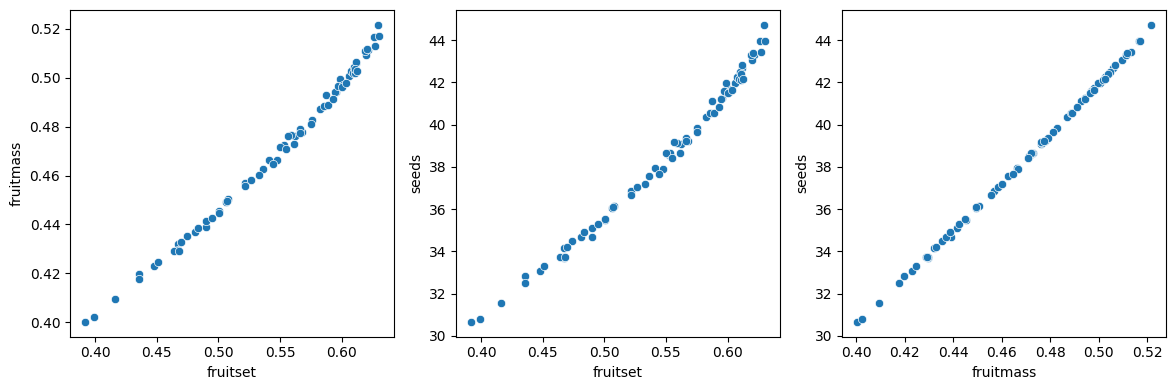

In [24]:
import itertools

X = ['fruitset', 'fruitmass', 'seeds']
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for (x_, y_), ax in zip(itertools.combinations(X, 2), axes):
    sns.scatterplot(data=df_berry2, x=x_, y=y_, ax=ax)
plt.tight_layout()
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

X_vif = add_constant(df_berry2[X]).values
vifs = [variance_inflation_factor(X_vif, i) for i in range(1, 4)]
vifs, X[np.argmax(vifs)]

c:\users\user\python3.7\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


([924.9268899020105, 17840.509291167236, 11009.397806036754], 'fruitmass')

In [26]:
X2 = ['fruitset', 'seeds']
X_vif = add_constant(df_berry2[X2]).values
vifs = [variance_inflation_factor(X_vif, i) for i in range(1, 3)]
vifs, X[np.argmax(vifs)]

([75.20025416716815, 75.20025416716815], 'fruitset')

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = ['fruitset', 'fruitmass', 'seeds']
pca = PCA()
pca.fit(df_berry2[X])
pca.explained_variance_ratio_

array([9.99996013e-01, 3.98250685e-06, 4.16059408e-09])

In [28]:
from statsmodels.api import add_constant
X_pca = pca.transform(df_berry2[X])
lm3 = OLS(y, add_constant(X_pca)).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4168.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.31e-80
Time:                        12:57:57   Log-Likelihood:                -448.72
No. Observations:                  76   AIC:                             905.4
Df Residuals:                      72   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6609.9425     10.453    632.340      0.000    6589.105    6630.780
x1          -321.6896      2.880   -111.703      0.000    -327.430    -315.949
x2         -6857.2555   1443.094     -4.752      0.000   -9734.012   -3980.499
x3         -7.531e+04   4.46e+04     -1.687      0.096   -1.64e+05    1.37e+04
==============================================================================
Omnibus:                        3.761   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.985
Skew:                           0.370   Prob(JB):                        0.225
Kurtosis:                       3.628   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 9. 이상점과 영향점
- 이상점(Outlier): 다른 데이터들과 현저히 다른 값을 가진 관측값
- 영향점(Influential Point): 회귀 모델에 포함될 경우 회귀 계수에 영향을 주는 점

#### 영향점 판단 지표


| 지표 | 의미 | 공식 |
| --- | --- | --- |
| 지렛값<br/>(Leverage) | 관측값 i 의 독립 변수가 얼마나 떨어져<br/>회귀선의 위치와 기울기를 끌어당기는지 나타냄 |$$h_{ii} = x_i^T (X^T X)^{-1} x_i$$|
| t-표준화 잔차<br/>(Studentized Residual) | n-k-1 자유도의 t-분포를 따름<br/>가설검정을 통한 영향점 판단 |$$t_i = \frac{e_i}{\sqrt{MSE_{(-i)}(1-h_{ii})}}$$|
| DFFITS | 관측값이 예측값에 영향을 주는 정도 |$$DFFITS_i = \frac{\hat{y}_i - \hat{y}_{i(-i)}}{\sqrt{MSE_{(-i)}h_{ii}}}$$|
| DFBETAS | 관측값이 회귀 계수에 영향을 주는 정도 |$$DFBETAS_{ij} = \frac{e_i}{\sqrt{MSE_{(-i)}[(X^TX)^{-1}]_{jj}}}$$|

$MSE(−𝑖)=\frac{𝑆𝑆𝐸_{(−𝑖)}}{𝑛−𝑘−1}$

> $𝑆𝑆𝐸_{(−𝑖)}$: 𝑖를 제외한 회귀모델의 오차제곱합

$\hat{y}_{(−𝑖)}$: 𝑖를 제외한 회귀모델의 $𝑦_𝑖$의 예측값

$\hat{\beta}_{j(−𝑖)}$: 𝑖를 제외한 회귀모델의 $\beta_j$의 예측값

$[\cdot]_{jj}$: j번째 대각원소

**[Ex. 9]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

df_berry2에서 yield 는 종속 변수 fruitset, fruitmass, seeds은 독립 변수로 회귀 모델의 영향점 관련 지표를 구해봅니다. 

</div>

In [29]:
X_lr = ['fruitset', 'fruitmass', 'seeds']
X = df_berry2[X_lr].assign(const = 1)
y = df_berry2['yield']
gram_inv = np.linalg.inv(X.T.dot(X))
beta_hat = np.dot(gram_inv, X.T.dot(y))
n = len(df_berry2)
k = len(X_lr) + 1
beta_hat

array([ 15059.47075129, -74102.12957764,    706.52782574,   6034.95228195])

In [30]:
# 지렛값
h = np.diagonal(
    np.dot(
        np.dot(X, gram_inv), X.T
    )
)
h

array([0.04966418, 0.0228982 , 0.10236921, 0.19067006, 0.01854852,
       0.02501485, 0.08844794, 0.11512758, 0.03255582, 0.04150351,
       0.02657329, 0.09055495, 0.02535283, 0.10881293, 0.02812982,
       0.0619846 , 0.04058191, 0.19194234, 0.04284604, 0.03634552,
       0.02317355, 0.05250472, 0.08348112, 0.13959204, 0.0383335 ,
       0.02868844, 0.04884269, 0.0756472 , 0.02369511, 0.0282819 ,
       0.04240075, 0.05770302, 0.03542383, 0.04804474, 0.046155  ,
       0.03396893, 0.03580054, 0.08527742, 0.017891  , 0.02994094,
       0.02354788, 0.03352411, 0.03023538, 0.05534643, 0.02581455,
       0.04058284, 0.01369459, 0.03255751, 0.03220833, 0.07180644,
       0.034631  , 0.02014734, 0.04848018, 0.02504581, 0.04651555,
       0.04900776, 0.04242059, 0.09285386, 0.05296641, 0.073453  ,
       0.0516053 , 0.08103669, 0.03898111, 0.03359969, 0.04831148,
       0.02719157, 0.04922561, 0.06713651, 0.0473192 , 0.07696876,
       0.03954334, 0.0659712 , 0.0337821 , 0.06659808, 0.03310

In [31]:
# 표준화 전차 
y_prd = df_berry2[X_lr].assign(const=1).dot(beta_hat)
sse = ((y_prd - y) ** 2).sum()
mse = sse / (n - k)
t_std = (df_berry2['yield'] - y_prd) / np.sqrt((mse * (1- h)))
t_std

51    -0.859957
52    -1.491296
55    -0.388846
56     0.237371
67    -0.853289
         ...   
328    1.231179
339    1.287690
340    1.826303
343   -1.126744
344    0.206484
Length: 76, dtype: float64

In [32]:
def get_stat_without_i(df, x):
    """
    df의 mse를 구하고, x의 예측값을 구합니다. 
    dffits는 데이터 포인트를 제외한 나머지 데이터로 선형 모델을 학습시키고,
    MSE를 구하고 제외한 데이터 포인트로 예측값이 필요합니다.
    df에는 x를 제외한 나머지 데이터를 전달받습니다.
    Parameters:
        df: pd.DataFrame
            선형모델을 학습시키고, mse를 구할 데이터
        x: pd.Series
            예측값을 만들 데이터
    Returns:
        float, float
            MSE_i, yii_hat
    """
    lm = ols('yield_ ~ ' + '+'.join(X_lr), data=df.rename(columns={'yield': 'yield_'})).fit()
    return pd.concat([
        pd.Series([lm.mse_resid, lm.predict(x).values[0]], index=['MSE_i', 'yii_hat']),
        lm.params
    ], axis=0)
C = np.linalg.inv(df_berry2[X_lr].assign(const=1).pipe(lambda x: x.T.dot(x)))
df_fit_without_i = df_berry2.apply(
    lambda x: get_stat_without_i(
        df_berry2.loc[df_berry2.index != x.name], x
    ), axis=1
).assign(
    dffits = lambda x: (s_prd - x['yii_hat']) / ((x['MSE_i'] * h) ** 0.5),
    dfbetas0 = lambda x: (lm.params['Intercept'] - x['Intercept']) / ((x['MSE_i'] * C[3, 3]) ** 0.5),
    dfbetas1 = lambda x: (lm.params[X_lr[0]] - x[X_lr[0]]) / ((x['MSE_i'] * C[0, 0]) ** 0.5),
    dfbetas2 = lambda x: (lm.params[X_lr[1]] - x[X_lr[1]]) / ((x['MSE_i'] * C[1, 1]) ** 0.5),
    dfbetas3 = lambda x: (lm.params[X_lr[2]] - x[X_lr[2]]) / ((x['MSE_i'] * C[2, 2]) ** 0.5)
)
df_fit_without_i.head()

,MSE_i,yii_hat,Intercept,fruitset,fruitmass,seeds,dffits,dfbetas0,dfbetas1,dfbetas2,dfbetas3
51,8334.851953,6076.466720,5033.977512,14385.613681,-67289.635170,658.873010,-0.196230,0.150957,0.132127,-0.153228,0.157390
52,8161.227472,6828.525810,5586.985606,14900.678920,-70966.230998,682.144679,-0.230288,0.068273,0.031465,-0.071279,0.081382
55,8403.664395,5036.557138,5362.779345,14585.270239,-69521.007787,674.750723,-0.130537,0.100954,0.092598,-0.102617,0.104520
56,8414.759051,3944.285501,5912.698335,15091.667059,-73237.646872,698.674377,0.114456,0.018349,-0.006283,-0.019352,0.025814
67,8336.188151,6656.725459,5916.285269,15051.402412,-73234.987572,699.155325,-0.117081,0.017895,0.001582,-0.019502,0.024347


In [33]:
# statmodels로 여러 이상점 판단지표를 구해봅니다.
from statsmodels.formula.api import ols
# patsy formula를 통해 종속변수와 독립 변수를 정의합니다. 절편 기본적으로 포함을 합니다.
lm = ols('yield_ ~ fruitset + fruitmass + seeds', data=df_berry2.rename(columns={'yield': 'yield_'})).fit()

influence = lm.get_influence()

df_influence = pd.concat([
    pd.Series(influence.resid_studentized, name='studentized residuals'),
    pd.Series(influence.dffits[0], name='dffits'),
    pd.DataFrame(influence.dfbetas, columns=['dfbetas0', 'dfbetas1', 'dfbetas2', 'dfbetas3']),
], axis=1).set_index(df_berry2.index)
df_influence

,studentized residuals,dffits,dfbetas0,dfbetas1,dfbetas2,dfbetas3
51,-0.859957,-0.196230,0.150957,0.132127,-0.153228,0.157390
52,-1.491296,-0.230288,0.068273,0.031465,-0.071279,0.081382
55,-0.388846,-0.130537,0.100954,0.092598,-0.102617,0.104520
56,0.237371,0.114456,0.018349,-0.006283,-0.019352,0.025814
67,-0.853289,-0.117081,0.017895,0.001582,-0.019502,0.024347
...,...,...,...,...,...,...
328,1.231179,0.328399,0.259358,0.262873,-0.255505,0.248210
339,1.287690,0.241902,-0.086701,-0.062033,0.086199,-0.090383
340,1.826303,0.496058,-0.182419,-0.245137,0.170917,-0.144111
343,-1.126744,-0.208895,-0.086574,-0.118976,0.083489,-0.072233


### 10. 로지스틱 회귀

- 종속변수(Y)가 0 또는 1의 이진형 변수

- $p = P(Y = 1)$을 추정

- 로짓 함수(Logit Function): 확률(p)을 전체 실수 영역으로 변환

$\text{Logit}(p) = \log\left(\frac{p}{1-p}\right) = Z = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p$

- 로지스틱 함수(Logistic Function): 로짓을 $p$로 변환

$p = \sigma(Z) = \frac{1}{1+e^{-Z}}$

#### 추정 방법: 최대 우도 추정(Maximum Likelihood Estimation)

$P(Y = 1|X = \mathbf{x}) = \sigma(z) = \frac{1}{1+e^{-z}}, \text{ where } z = \beta_0 + \beta_1 x_i + \cdots + \beta_p x_p$

▷ 절편은 모든 변수가 1인 상수항을 추가하여 처리

> $P(Y = 1|X = \mathbf{x}_i) = \sigma(z_i) = \frac{1}{1+e^{-z_i}}, \text{ where } z_i = \boldsymbol{\beta}\mathbf{x}_i$
>
> $P(Y = y_i|X = \mathbf{x}_i) = \sigma(z_i)^{y_i}(1-\sigma(z_i))^{1-y_i}$
>
> $L(\boldsymbol{\beta}) = \prod_{i=1}^{n} \sigma(z_i)^{y_i}(1-\sigma(z_i))^{1-y_i}$
>
> $\log L(\boldsymbol{\beta}) = \sum_{i=1}^{n}\left(y_i \log \sigma(z_i) + (1-y_i)\log(1-\sigma(z_i))\right)$
>
> $\hat{\boldsymbol{\beta}} = argmax_{\boldsymbol{\beta}} L(\boldsymbol{\beta}) \quad \Rightarrow \quad \text{해석적 방법으로는 불가}$

#### 다중클래스에 적용
|   | Soft max 회귀 | One-vs-Rest | One-vs-One |
| --- | --- | --- | --- |
| 방법 | 클래스별 확률을 Softmax 함수로 계산 | 하나의 클래스 vs 나머지 K 개의 이진 로지스틱 회귀 모델 생성<br/>가장 확률이 높은 클래스 선택 | K 개의 클래스에 대해 개의 이진 분류기 생성<br/>다수결 투표 방식으로 예측 |
| 장점 | 이론적으로 정밀도가 높음<br/>클래스 간 관계를 반영 | 단순하고 구현이 쉬움 | 복잡한 경계 학습 가능 |
| 단점 | 계산 복잡도 증가 | 편향된 결과 | 계산 복잡도의 증가<br/>전체 확률 추정 어려움 |